In [584]:
# check scikit-learn version
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import collections
from sklearn.metrics import classification_report
print(sklearn.__version__)

0.20.1


In [585]:
import pandas as pd
data= pd.read_csv("/Users/ashishkothari/Downloads/Football_NN.csv")

In [586]:
data.columns

Index(['play_id', 'PlayOfGame', 'yardline_100', 'game_seconds_remaining',
       'drive', 'qtr', 'down', 'ydstogo', 'yards_gained', 'shotgun',
       'no_huddle', 'qb_dropback', 'Run To Left', 'Run To Right',
       'Run Gap Center', 'Run Gap End', 'Run Gap Middle Right',
       'score_differential_post'],
      dtype='object')

In [587]:
df = data
# To display the top 5 rows
df.head(5)

,play_id,PlayOfGame,yardline_100,game_seconds_remaining,drive,qtr,down,ydstogo,yards_gained,shotgun,no_huddle,qb_dropback,Run To Left,Run To Right,Run Gap Center,Run Gap End,Run Gap Middle Right,score_differential_post
0,269,3,95,3397,2,1,2.0,15,4,1,0,0,0,0,1,0,0,0
1,486,6,99,3230,4,1,1.0,10,6,1,0,0,0,1,0,0,0,0
2,675,12,66,3099,6,1,1.0,10,6,0,0,0,0,0,1,0,0,0
3,697,13,60,3070,6,1,2.0,4,3,1,0,0,0,0,1,0,0,0
4,718,14,57,3030,6,1,3.0,1,0,1,0,0,0,0,1,0,0,0


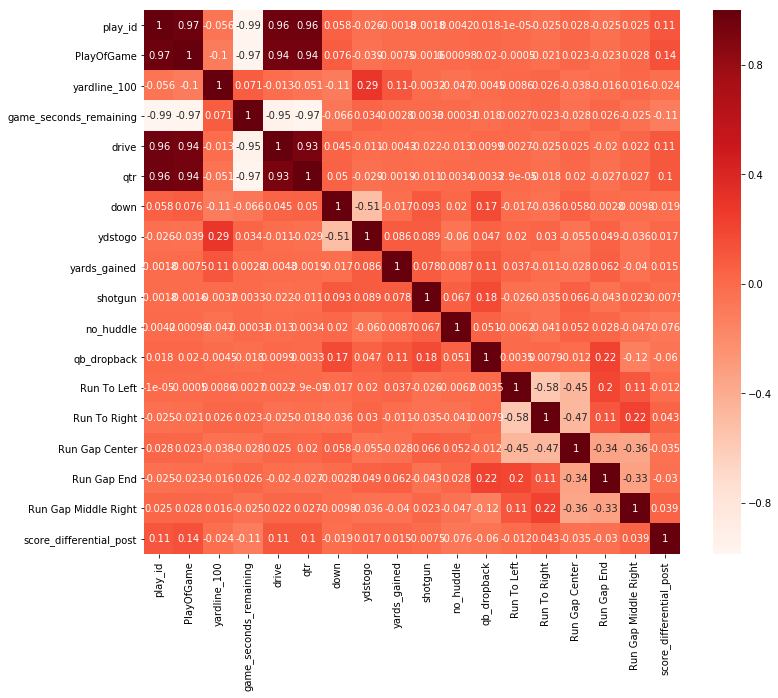

In [588]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [589]:
data1= data[['yardline_100','ydstogo','shotgun','qb_dropback','Run Gap End','yards_gained']]
data1.columns

Index(['yardline_100', 'ydstogo', 'shotgun', 'qb_dropback', 'Run Gap End',
       'yards_gained'],
      dtype='object')

In [590]:
data1_data = data1 
#separate training variables
data1_labels = data1.yards_gained #what we are predicting

In [591]:
data1_labels

0        4
1        6
2        6
3        3
4        0
5        2
6        1
7        2
8        7
9        5
10       3
11      18
12       3
13       4
14      12
15       1
16       9
17      10
18       3
19       7
20      -2
21       5
22       3
23       7
24       3
25       2
26       0
27       2
28      -3
29       2
        ..
5268     3
5269     3
5270     5
5271     2
5272     0
5273     7
5274     6
5275     6
5276     1
5277     3
5278     5
5279     7
5280     1
5281     0
5282     3
5283     3
5284    11
5285     1
5286     9
5287     2
5288    12
5289    10
5290     6
5291     2
5292     3
5293     9
5294     1
5295     1
5296     0
5297     0
Name: yards_gained, Length: 5298, dtype: int64

In [592]:
#create feature and taregt datasets
X = np.array(data1_data)
#X = np.delete(X, np.s_[-1:], axis=1)
y = np.array(data1_labels)

#split into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 21)


In [593]:
#scale the features for better results
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [602]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors= 1)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [603]:
#predict on dataset which model has not seen before
print(knn.predict(X_test))

[18  7 14 ... -1  1  0]


In [604]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [605]:
knn.score(X_test,y_test)

0.7075471698113207

In [472]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         -15       0.00      0.00      0.00         1
         -11       0.00      0.00      0.00         0
         -10       0.00      0.00      0.00         1
          -7       0.00      0.00      0.00         3
          -6       0.00      0.00      0.00         2
          -5       0.00      0.00      0.00         5
          -4       0.00      0.00      0.00         5
          -3       0.00      0.00      0.00        20
          -2       0.05      0.04      0.04        28
          -1       0.14      0.09      0.11        47
           0       0.15      0.08      0.11        95
           1       0.22      0.25      0.23       122
           2       0.16      0.22      0.19       132
           3       0.13      0.13      0.13       134
           4       0.11      0.12      0.11       101
           5       0.10      0.11      0.10        70
           6       0.10      0.09      0.09        56
           7       0.05    

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/m

In [537]:
data1= data[['PlayOfGame','yardline_100','game_seconds_remaining','drive','qtr','ydstogo','shotgun','no_huddle','qb_dropback','Run To Left','Run To Right','Run Gap Center','Run Gap End','Run Gap Middle Right','score_differential_post','yards_gained']]
data1.columns

Index(['PlayOfGame', 'yardline_100', 'game_seconds_remaining', 'drive', 'qtr',
       'ydstogo', 'shotgun', 'no_huddle', 'qb_dropback', 'Run To Left',
       'Run To Right', 'Run Gap Center', 'Run Gap End', 'Run Gap Middle Right',
       'score_differential_post', 'yards_gained'],
      dtype='object')

In [538]:
#create feature and taregt datasets
X = np.array(data1)
X = np.delete(X, np.s_[-1:], axis=1)
y = np.array(data1_labels)

#split into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 21)


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature:0, Score: 0.132635
Feature:1, Score: 0.203290
Feature:2, Score: 0.228668
Feature:3, Score: 0.092448
Feature:4, Score: 0.016383
Feature:5, Score: 0.068199
Feature:6, Score: 0.029656
Feature:7, Score: 0.010327
Feature:8, Score: 0.010350
Feature:9, Score: 0.019883
Feature:10, Score: 0.017940
Feature:11, Score: 0.013280
Feature:12, Score: 0.019233
Feature:13, Score: 0.013704
Feature:14, Score: 0.124002


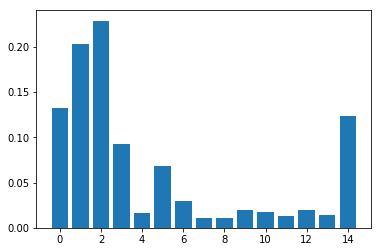

In [539]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
model = RandomForestRegressor()
model.fit(X_train, y_train)
importance = model.feature_importances_
#summarize feature importance
for i,v in enumerate(importance): print('Feature:%0d, Score: %5f'%(i,v))
#plot feature importance
pyplot.bar([x for x in range(len(importance))],importance)
pyplot.show()

In [610]:
data2= data[['yardline_100','game_seconds_remaining','drive','ydstogo','shotgun','yards_gained']]
data2.columns

Index(['yardline_100', 'game_seconds_remaining', 'drive', 'ydstogo', 'shotgun',
       'yards_gained'],
      dtype='object')

In [611]:
#create feature and taregt datasets
X = np.array(data2)
#X = np.delete(X, np.s_[-1:], axis=1)
y = np.array(data1_labels)

#split into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 21)

In [612]:
#scale the features for better results
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [621]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors= 5)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [622]:
#predict on dataset which model has not seen before
print(knn.predict(X_test))

[10  7 10 ...  0  1  0]


In [623]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [624]:
knn.score(X_test,y_test)

0.310377358490566

In [507]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         -15       0.00      0.00      0.00         1
         -10       0.00      0.00      0.00         1
          -7       0.00      0.00      0.00         3
          -6       0.00      0.00      0.00         2
          -5       0.00      0.00      0.00         5
          -4       0.00      0.00      0.00         5
          -3       0.00      0.00      0.00        20
          -2       0.20      0.11      0.14        28
          -1       0.19      0.09      0.12        47
           0       0.29      0.35      0.32        95
           1       0.34      0.53      0.42       122
           2       0.26      0.36      0.30       132
           3       0.38      0.37      0.38       134
           4       0.34      0.35      0.34       101
           5       0.23      0.27      0.25        70
           6       0.23      0.16      0.19        56
           7       0.13      0.08      0.10        48
           8       0.12    

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/m